In [3]:
!pip install pydlm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.7 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('MBB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,6/1/2018,11783.9,11642.9,11965.2,11562.3,15.87M,0.52%
1,6/4/2018,12267.4,11723.5,12267.4,11683.2,16.32M,4.10%
2,6/5/2018,12267.4,12247.2,12408.4,12005.5,13.13M,0.00%
3,6/6/2018,12307.6,12126.4,12388.2,12045.8,17.76M,0.33%
4,6/7/2018,12448.7,12408.4,12650.1,12327.8,22.65M,1.15%
...,...,...,...,...,...,...,...
1237,5/15/2023,18850.0,18750.0,19100.0,18700.0,17.77M,1.07%
1238,5/16/2023,18800.0,18850.0,18950.0,18700.0,6.75M,-0.27%
1239,5/17/2023,18450.0,18750.0,18800.0,18450.0,9.09M,-1.86%
1240,5/18/2023,18600.0,18550.0,18650.0,18450.0,6.66M,0.81%


In [5]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('MBB.csv')
df = df[['Price','Date','High']]
print(df)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

        Price       Date     High
0     11783.9   6/1/2018  11965.2
1     12267.4   6/4/2018  12267.4
2     12267.4   6/5/2018  12408.4
3     12307.6   6/6/2018  12388.2
4     12448.7   6/7/2018  12650.1
...       ...        ...      ...
1237  18850.0  5/15/2023  19100.0
1238  18800.0  5/16/2023  18950.0
1239  18450.0  5/17/2023  18800.0
1240  18600.0  5/18/2023  18650.0
1241  18650.0  5/19/2023  18700.0

[1242 rows x 3 columns]


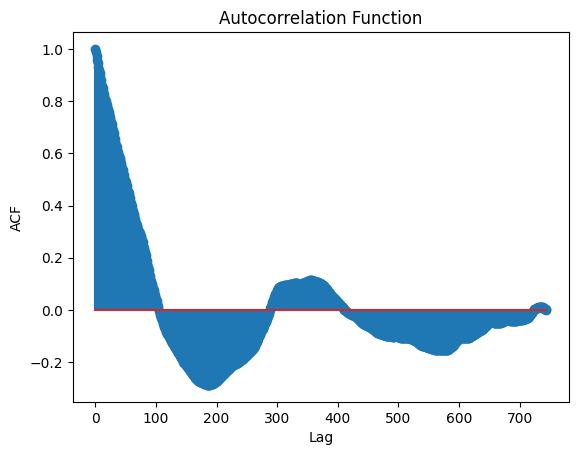

In [6]:
# Tính toán ACF
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data['Price'], nlags= 1000
                           )

# Vẽ đồ thị ACF
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

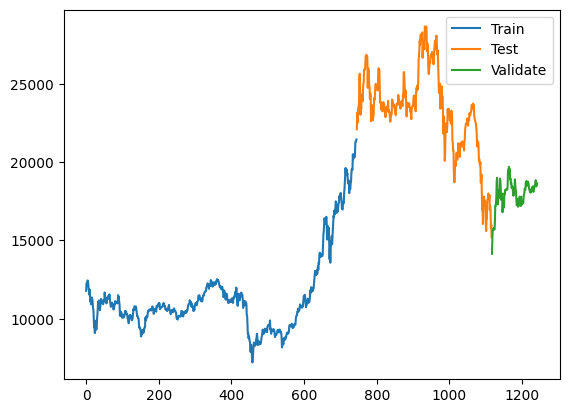

In [7]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index,val_data['Price'])
plt.legend(['Train', 'Test','Validate',])
plt.show()

In [8]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

feature = []
for price in train_data['High']:
  feature.append([price])
print(feature)
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
model = dlm(y_train)
model = model + trend(1, name='lineTrend', w=1.0)
model = model + autoReg(degree=3, data=y_train, name='ar1', w=1e7) + longSeason(period=8, stay=1, data=y_train, name='monthly', w=3.0) + dynamic(features=feature, discount=1, name='High')


[[11965.2], [12267.4], [12408.4], [12388.2], [12650.1], [12488.9], [12549.4], [12126.4], [11965.2], [11924.9], [11884.6], [11945.1], [11139.3], [11381.0], [11240.0], [11240.0], [11522.1], [11320.6], [11320.6], [10998.3], [10837.2], [10535.0], [10132.2], [9689.0], [9709.1], [9708.1], [10139.6], [10043.7], [9636.2], [9875.9], [10115.6], [10379.3], [10786.8], [11122.4], [11074.5], [11266.2], [11386.1], [11050.5], [11002.6], [10786.8], [11146.4], [11266.2], [11458.0], [11314.2], [11050.5], [11242.3], [11170.3], [11146.4], [11266.2], [11410.1], [11146.4], [11673.7], [11745.6], [11601.8], [11362.1], [11482.0], [11290.2], [11242.3], [11362.1], [11290.2], [11386.1], [11577.8], [11625.8], [11482.0], [11577.8], [11697.7], [11386.1], [11122.4], [11002.6], [10954.6], [10978.6], [11026.5], [11122.4], [11074.5], [10978.6], [10834.8], [10619.0], [10810.8], [10882.7], [11050.5], [11218.3], [11170.3], [11146.4], [11074.5], [11218.3], [11218.3], [11098.4], [11074.5], [11649.8], [11625.8], [11434.0], [11

/usr/local/lib/python3.10/dist-packages/pydlm/modeler/autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [9]:

model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [10]:
# 4. Quá trình testing
x_test= []

for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Price'])
y_pred = model.predictN(date = model.n-1, N=len(x_test),featureDict={'High': x_test})
y_pred = y_pred[0]



(372, 1)


In [11]:

y_val = np.array(val_data['Price'])
x_val= []

for price in val_data['High']:
  x_val.append([price])
print(type(x_val))

size = test_size + val_size
y_pred_val = model.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[15118.947370146036, 17573.514249047377, 16340.05485554769, 17612.30252114293, 16817.458331319693, 17696.83693542587, 16859.235780371524, 17064.866463931216, 17230.979373983013, 18224.62598960393, 18081.168215945796, 18393.92395140645, 19120.90346132077, 19272.77369875044, 19828.631602424146, 19340.023736319883, 18531.091683074515, 19384.345440064255, 18701.57233104885, 19219.789328285566, 18539.24210539665, 19292.600228743533, 19674.959337822405, 19521.38140806422, 19832.116061483364, 18907.382310129295, 18762.9398645816, 19060.03020268937, 18629.130275059255, 18644.49955976608, 18124.43575888248, 18603.79337558325, 18377.165859667133, 18525.75093852466, 18849.737326111826, 18993.21343336694, 19032.013155242377, 19523.26922093886, 19090.46599233349, 19159.50422670022, 19203.1411835843, 19176.204879219968, 19322.071624088832, 19256.259540248866, 20195.108513636304, 19949.091991481357, 20405.482812653856, 20484.13495326981, 20281.764296543355, 20143.729395417125, 20541.75

In [12]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1218.4537169587204
Testing RMSE: 1419.3250703408492
Validation MAPE: 6.613081576578359
Testing MAPE: 4.964035253337274
Validation MAE: 1178.3578842829293
Testing MAE: 1030.616730933544


In [ ]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data['High'])
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

print(feature_next_30_days)






[9007.7483577  9006.03020363 9004.31204955 9002.59389548 9000.8757414
 8999.15758733 8997.43943325 8995.72127918 8994.00312511 8992.28497103
 8990.56681696 8988.84866288 8987.13050881 8985.41235473 8983.69420066
 8981.97604659 8980.25789251 8978.53973844 8976.82158436 8975.10343029
 8973.38527621 8971.66712214 8969.94896807 8968.23081399 8966.51265992
 8964.79450584 8963.07635177 8961.35819769 8959.64004362 8957.92188955]


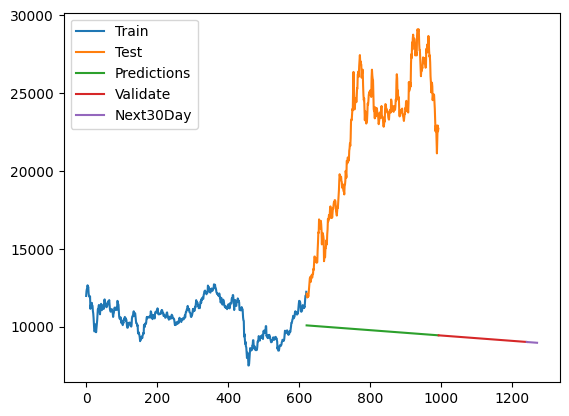

In [ ]:
plt.plot(train_data.index, train_data['High'])
plt.plot(test_data.index, test_data['High'])
plt.plot(test_data.index,y_pred_ln)
plt.plot(val_data.index,y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = model.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)


<class 'list'>
2
[8917.355432191242, 9673.225290962695, 9072.470680085957, 9543.511485091653, 9349.257931617436, 9482.27543129633, 9366.954169713696, 9432.19394190867, 9433.646591468743, 9439.530760865977, 9439.806412236414, 9392.878544247302, 9473.954043581385, 9416.950078860864, 9430.735841379648, 9414.435607179576, 9469.97586377948, 9440.263147831574, 9463.72819666385, 9401.5626540814, 9492.628924346061, 9429.08285908026, 9447.158736155572, 9428.046579209453, 9485.429635101173, 9454.508950847037, 9478.76574992883, 9416.081267482316, 9507.487681010867, 9443.718670575974]


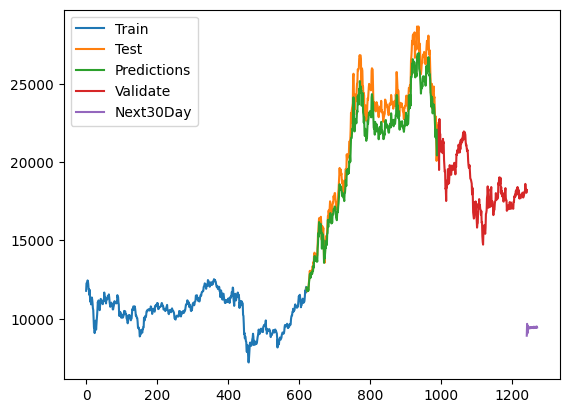

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index,y_pred)
plt.plot(val_data.index,y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()